In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from helper import * 
import random

In [2]:
train_x_ori = pd.read_csv('X_train.csv').values
train_y = pd.read_csv('Y_train.csv').T.values
test_x_ori = pd.read_csv('X_test.csv').values

In [3]:
num_train = len(train_x_ori)
num_test = len(test_x_ori)

print("Number of training examples: num_train = " + str(num_train))
print("Number of testing examples: num_test = " + str(num_test))
print("train_x shape: " + str(train_x_ori.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x shape: " + str(test_x_ori.shape))

Number of training examples: num_train = 32561
Number of testing examples: num_test = 16281
train_x shape: (32561, 106)
train_y shape: (1, 32561)
test_x shape: (16281, 106)


In [4]:
train_x_reshape = train_x_ori.T
test_x_reshape = test_x_ori.T

print("train_x shape: " + str(train_x_reshape.shape))
print("train_y shape: " + str(train_y.shape))
print("test_x_shape: " + str(test_x_reshape.shape))
# print("sanity check before reshaping: \n" + str(train_x_ori[:5, :])) 
# print("sanity check after reshaping: \n" + str(train_x_reshape[:, :5]))

train_x shape: (106, 32561)
train_y shape: (1, 32561)
test_x_shape: (106, 16281)


In [5]:
def compute_mean_std(X):
   
    mu = np.mean(X,keepdims=True,axis=1)
    sigma = np.std(X,keepdims=True,axis=1)
    
    return mu, sigma


def normalize_feat(X, mu, sigma):
    
    B = (X - mu) / sigma
    return B

print('Compute means and standard deviations ...\n')
mu, sigma = compute_mean_std(train_x_reshape)
# print('Mean values are: \n', mu)
# print('Standard deviations are: \n', sigma)

Compute means and standard deviations ...



In [6]:
train_x = normalize_feat(train_x_reshape, mu, sigma)

test_x = normalize_feat(test_x_reshape, mu, sigma)

In [7]:
def initialize_with_zeros(dim):
    
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [8]:
def propagate(w, b, X, Y):
   
    N = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X) + b)
    cost = np.sum((A-Y)**2) / (2*N)
    
    dw = np.dot(X,(A-Y).T) / N
    db = np.sum(A-Y) /N
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [9]:
def optimize(w, b, X, Y, num_epoch, batch_size, learning_rate):
    
    costs = []
    
    for t in range(num_epoch):
        
        num_iterations = int(X.shape[1]/batch_size)
        
        train_data = np.vstack((X, Y)).T
        np.random.shuffle(train_data)
        X, Y = train_data.T[:X.shape[0],:], train_data.T[X.shape[0]:,:]
        
        for i in range(num_iterations):
            
            grads, cost = propagate(w, b, X[:,i*batch_size:(i+1)*batch_size], Y[:,i*batch_size:(i+1)*batch_size])

            dw = grads["dw"]
            db = grads["db"]

            w = w - learning_rate*dw
            b = b - learning_rate*db

            if i == num_iterations-1:
                costs.append(cost)
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [10]:
def predict(w, b, X):
   
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    Y_prediction = sigmoid(np.dot(w.T,X) + b)
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [11]:
def accuracy(pred_probability, Y_train):
    
    Y_prediction = pred_probability > 0.5
    row = []
    for i in Y_prediction.tolist()[0]:
        if i:
            row.append(1)
        else:
            row.append(0)

    count = 0
    for j in range(0, len(row)):
        if row[j] == Y_train[0, j]:
            count = count + 1
    return(count/len(row))

In [12]:
def model(X_train, Y_train, num_epoch=10, batch_size=512, learning_rate=0.05):
    
    
    w,b = initialize_with_zeros(X_train.shape[0])

    params,grads,costs = optimize(w,b,X_train,Y_train,num_epoch,batch_size,learning_rate)
    
    w = params['w']
    b = params['b']
    
    Y_prediction_train = predict(w,b,train_x)

#   print("train cost: {}".format(costs[-1]))

    
    d = {"costs": costs,
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_epochs": num_epoch}
    
    return d

In [21]:
best_accuracy = 0
best_costs = []
best_w, best_b = initialize_with_zeros(train_x.shape[0])
best_e = 0
best_s = 0
best_l = 0

for e in [50, 100, 150, 200]:  
    for s in [64, 128, 256, 512]:
        for l in [0.5, 0.1, 0.05, 0.01]:
            d = model(train_x, train_y, num_epoch=e, batch_size=s, learning_rate=l)
            temp_accuracy = accuracy(d["Y_prediction_train"], train_y)

            if temp_accuracy > best_accuracy: 
                best_accuracy = temp_accuracy
                best_costs = d["costs"]
                best_w = d['w']
                best_b = d['b']
                best_e = e
                best_s = s
                best_l = l
            
print("Accuracy", best_accuracy)
print("Cost", best_costs[-1])
print("Epoch", best_e)
print("Batch", best_s)
print("Rate", best_l)

Accuracy 0.8539971131107768
Cost 0.049770242400301354
Epoch 100
Batch 128
Rate 0.01


In [22]:
save_model(d['w'],d['b'])
predict_and_save_result(test_x)

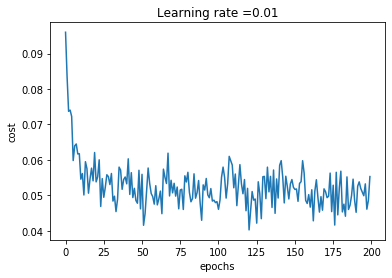

In [23]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('epochs')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()